# Projeto1-Gabriel Zezze


## Este projeto consiste na escolha de 2 indicadores obtidos no gapminder e o indicador de IDH e fazer as análises individuais destes indicadores e após estas análises, deveria ser feito as análises dos indicadores em conjunto entre si e assim poder responder as questões previamente formuladas.


### Questões a serem exploradas:
1-Países subdesenvolvidos(baixo IDH) possuem nescessariamente altos índices de corrupção(CPI)?

2-Países com alto índice de acesso a internet significa nescessariamente um pais desenvolvido com alto IDH ?


#### *(As análises se iniciam após esta caixa de codigo abaixo,desculpas pela inconveniência) *


In [1]:
#Imports Padrões#
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#Lendo dados pelo panda#
Dados = pd.read_excel('Projeto1_GabrielZezze.xlsx')
#Utilizando Paises como indices#
Data = Dados.set_index('Países')
#Utilizando ranges de corrupção como categorias#
x = range(0, 120, 20)
labels = ['Extremamente Corruptos(0-20)','Muito Corruptos(20-40)','Mediamente Corruptos(40-60)','Pouco Corruptos(60-80)','Não Corruptos(80-100)']
Data['Corrupção'] = pd.cut(Data['2012_Corrupção'], x, right=False, labels=labels)
#Utilizando ranges de % de usuarios de internet como categorias#
y = range(0,110,10)
Data['Usuários_Internet'] =pd.cut(Data['2012_Usuários_Internet'],y,right=False)
#Utilizando IDH em categorias#
z = np.arange(0,1.1,0.1)
labels2 = ['Baixo','Médio','Alto','Muito Alto']
Data['IDH_Cat'] =pd.cut(Data['2012_IDH'],z,right=False)
#Corrupção(CPI) com IDH#
IDH = Data.loc[:,['2012_IDH']]
CorrupQuali = Data.loc[:,['Corrupção']]
Corrup = Data.loc[:,['2012_Corrupção']]
Corrup_IDH_1 = IDH.join(Corrup, how='inner', lsuffix='_IDH', rsuffix='_Corrupção')
Corrup_IDH = Corrup_IDH_1.join(CorrupQuali, how='inner', lsuffix='_IDH', rsuffix='_Corrupção')
#Usuários de internet(% da População) com IDH#
Net_Users = Data.loc[:,['2012_Usuários_Internet']]
NetIDH = IDH.join(Net_Users, how='inner')

# -Análise de Indicadores individualmente-


# Índice de Corrupção (CPI) no ano de 2012
A primeira variável a ser análisada individualmente se trata do índice de percepção de corrupção(CPI em inglês) de um país, este índice se trata de um rankeamento de países com base em uma pontuação de 0 a 100 no qual 100 se trata de um país não corrupto e 0 se trata de um país extremamente corrupto.

Para iniciar a análise desta variável será utilizado um "Boxplot"(gráfico 1) e um histograma(gráfico 1.2) para poder avaliar a dispersão dos dados no intervalo interquartil, se existem uma quantidade significativa de "Outliers"(observação muito dispersa dos dados coletados) e por fim se há uma assimetria.

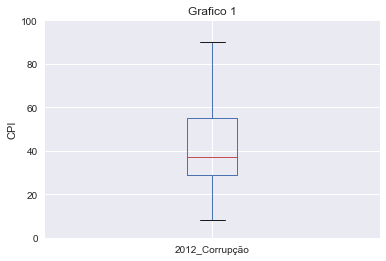

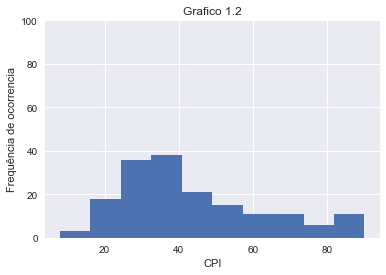

Primeiro Quartil: 29.0
Terceiro Quartil: 55.0
Intervalo Interquartil: 26.0
Desvio Padrão: 19.35694714346589
Mediana: 37.0
Limite Superior(maximo): 90.0
Limite Inferior(minimo): 8.0
Coeficiente de assimetria Pearson: 0    0.378037
dtype: float64


In [16]:
#Grafico 1#
CPI = Data['2012_Corrupção']
CPI.plot.box()
plt.ylabel("CPI")
plt.yticks(range(0,120,20))
plt.title("Grafico 1")
plt.show()
CPI.plot.hist()
plt.xlabel("CPI")
plt.ylabel("Frequência de ocorrencia")
plt.yticks(range(0,120,20))
plt.title("Grafico 1.2")
plt.show()
print("Primeiro Quartil: {}".format(CPI.quantile(0.25)))
print("Terceiro Quartil: {}".format(CPI.quantile(0.75)))
print("Intervalo Interquartil: {}".format(CPI.quantile(0.75)-CPI.quantile(0.25)))
print("Desvio Padrão: {}".format(CPI.std()))
print("Mediana: {}".format(CPI.median()))
print("Limite Superior(maximo): {}".format(max(CPI)))
print("Limite Inferior(minimo): {}".format(min(CPI)))
print("Coeficiente de assimetria Pearson: {}".format((CPI.mean()-CPI.mode())/CPI.std()))

A partir deste "Boxplot" e os dados impressos abaixo deste, pode ser concluido que 50% dos dados desta série estão localizados entre o intervalo do primeiro e terceiro quartil tambem conhecido como intervalo interquartil sendo este intervalo de 26 localizado entre os valores de 19(primeiro quartil) e 55(terceiro quartil), também é possivel concluir que estes dados são consideravelmente dispersos pois possuem um desvio padrão de 19.35, por fim pode ser observado uma pequena assimetria dos dados pois a mediana se encontra levemente deslocada em direção do primeiro quartil e com um coeficiente de assimetria de Pearson=0,378.




Para poder análisar melhor esta dispersão e avaliar a moda desta serie de dados será utilizado um gráfico de barras(gráfico 2) no qual o CPI(indice de corrupção) foi dividido em 5 categorias ,estas sendo: Extremamente Corruptos(0-20),Muito Corruptos(20-40),Mediamente Corruptos(40-60),Pouco Corruptos(60-80),Não Corruptos(80-100), este gráfico de barras se encontra em frequência no qual estes intervalos de valores aparecem dentro dos 170 países análisados.

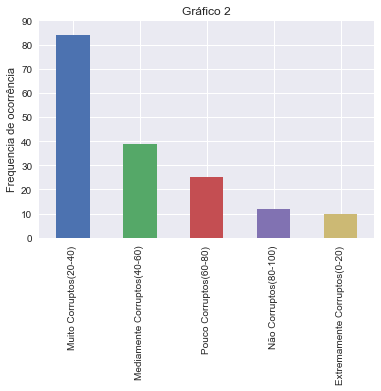

Muito Corruptos(20-40)          84
Mediamente Corruptos(40-60)     39
Pouco Corruptos(60-80)          25
Não Corruptos(80-100)           12
Extremamente Corruptos(0-20)    10
Name: Corrupção, dtype: int64
Moda: 0    36.0
dtype: float64
% com <40: 55.294117647058826
% com >80: 7.0588235294117645


In [3]:
#Gráfico 2#
CPI_Categorico = Data['Corrupção']
valores = CPI_Categorico.value_counts()
valores.plot.bar()
plt.yticks(range(0,100,10))
plt.title("Gráfico 2")
plt.ylabel("Frequencia de ocorrência")
plt.show()
print(valores)
print("Moda: {}".format(CPI.mode()))
print("% com <40: {}".format(((84+10)*100)/170))
print("% com >80: {}".format((12*100)/170))

Neste gráfico de barras(gráfico 2) é possivel observar que o intervalo o qual possui mais ocorrências é o intervalo de "Muito corruptos" ou seja 20 a 40 ,observando o gráfico e análisando os dados impressos abaixo pode-se dizer que a moda desta serie de valores é entre o intervalo de "Muito corruptos"(20 a 40), mais especificamente 36.Pode-se concluir também que 55,3% dos países análisados possuem um CPI menor ou igual a 40, o qual é considerado um índice de países muito corruptos e também que apenas 7% dos países análisados possuem um CPI maior ou igual a 80 o qual é considerado um CPI de países não corruptos.

# Usuários de Internet (% da população) no ano de 2012


Esta variavél se trata da porcentagem da população de um país que utiliza a internet.

O primeiro passo da análise desta variável se trata de usar um gráfico "Boxplot"(gráfico 3) e um histograma(gráfico 3.2) para poder observar o comportamento dos dados como intervalo interquartil,mediana,assimetria(se existente), dispersão e a possivel presença de "Outliers".

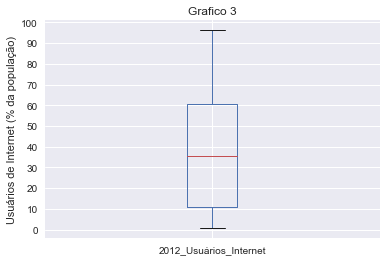

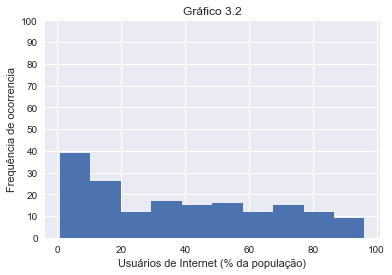

Primeiro Quartil: 10.8
Terceiro Quartil: 60.7
Intervalo Interquartil: 49.900000000000006
Desvio Padrão: 28.40369158835196
Mediana: 35.4
Limite Superior(maximo): 96.2
Limite Inferior(minimo): 0.8
Coeficiente de assimetria de Pearson: 0    1.164295
dtype: float64


In [15]:
#Grafico 3#
NetUsers= Data['2012_Usuários_Internet']
plt.ylabel("Usuários de Internet (% da população)")
plt.yticks(range(0,110,10))
plt.title("Grafico 3")
NetUsers.plot.box()
plt.show()
NetUsers.plot.hist()
plt.xlabel("Usuários de Internet (% da população)")
plt.ylabel("Frequência de ocorrencia")
plt.yticks(range(0,110,10))
plt.title("Gráfico 3.2")
plt.show()
print("Primeiro Quartil: {}".format(NetUsers.quantile(0.25)))
print("Terceiro Quartil: {}".format(NetUsers.quantile(0.75)))
print("Intervalo Interquartil: {}".format(NetUsers.quantile(0.75)-NetUsers.quantile(0.25)))
print("Desvio Padrão: {}".format(NetUsers.std()))
print("Mediana: {}".format(NetUsers.median()))
print("Limite Superior(maximo): {}".format(max(NetUsers)))
print("Limite Inferior(minimo): {}".format(min(NetUsers)))
print("Coeficiente de assimetria de Pearson: {}".format((NetUsers.mean()-NetUsers.mode())/NetUsers.std()))

A partir do "Boxplot" e do histograma e dos dados impressos abaixo deste, é possivel observar que para esta série de dados, 50% dos valores se encontram dentro do intervalo de 10,8% a 60,7% pois estes são respectivamente o primeiro e terceiro quartil, é possivel observar também que os dados são assimetricos pois possuem um coeficiente de assimetria de Pearson=1.16 o qual indica uma assimetria considerável e por fim podemos observar a mediana que se encontra em 35,4% e uma dispersão de dados considerável com um desvio padrão de 28,4%.


Para continuar a análise desta variável será utilizado um gráfico de barras(gráfico 4) no qual foram criadas categorias as quais variam de 0% a 100% em intervalos de 10%.Este gráfico demonstra a frequência de ocorrência de cada intervalo entre os 173 países nos quais há dados disponíveis.

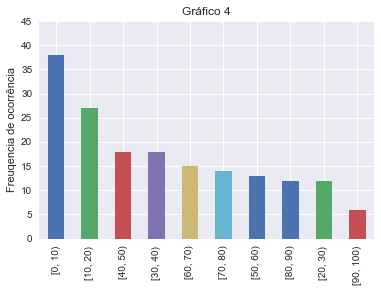

[0, 10)      38
[10, 20)     27
[40, 50)     18
[30, 40)     18
[60, 70)     15
[70, 80)     14
[50, 60)     13
[80, 90)     12
[20, 30)     12
[90, 100)     6
Name: Usuários_Internet, dtype: int64
Moda: 0    5.0
dtype: float64
% do intervalo mais frequente: 21.965317919075144%
% de países com 50% ou mais: 34.68208092485549%
% de países com 20% ou menos: 37.57225433526011%


In [5]:
#Gráfico 4#
NetUsers_Categorico = Data['Usuários_Internet']
valores2 = NetUsers_Categorico.value_counts()
valores2.plot.bar()
plt.yticks(range(0,50,5))
plt.title("Gráfico 4")
plt.ylabel("Freuqencia de ocorrência")
plt.show()
print(valores2)
print("Moda: {}".format(NetUsers.mode()))
print("% do intervalo mais frequente: {}%".format(3800/173))
print("% de países com 50% ou mais: {}%".format(6000/173))
print("% de países com 20% ou menos: {}%".format(6500/173))

Neste gráfico(gráfico 4) acima, e as informações impressas abaixo deste é possivel fazer uma análise dos valores mais frequêntes nesta série de dados, neste caso o intervalo de valores mais frequênte é de 0% a 10% o qual representa 21,9% dos países análisados , ou seja , 21,9% dos países análisados possuem apenas 0% a 10% da população com acesso a internet, é possivel também concluir que apenas 34,6% dos paises análisados possuem 50% ou mais de sua população com acesso a internet, e por fim é possivel observar que 37,5% dos paises análisados possuem 20% ou menos de sua população com acesso a internet.Observando esta série de dados e as considerações descritas neste paragrafo,pode-se concluir que dos 173 países analisados existem mais países nos quais menos de 20% de sua população tem acesso a internet do que países nos quais 50% ou mais de sua população tem acesso a internet.
A moda desta serie de dados se encontra no intervalo de 0% a 10%, mais especificamente 5%.

# Índice de desenvolvimento humano (IDH) no ano de 2012

A terceira e ultima variável a ser análisada se trata do Índice de desenvolvimento humano(IDH) o qual se trata de um índice mundialmente reconhecido que vai de 0 a 1, o qual é usado para classificar países desenvolvidos e sub-desenvolvidos através de uma equação a qual envolve expectativa de vida, PIB per capita e educação.



O início da análise desta variável se trata de usar um gráfico "Boxplot"(gráfico 5) e um histograma(gráfico 5.2) para observar características desta variável como: Intervalo interquartil,desvio padrão, mediana,dispersão,assimetria e possivel ocorrências de "Outliers".

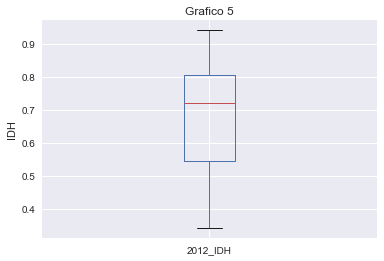

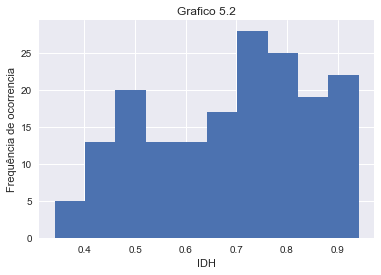

Primeiro Quartil: 0.5455000000000001
Terceiro Quartil: 0.8065
Intervalo Interquartil: 0.2609999999999999
Desvio Padrão: 0.15839263948498794
Mediana: 0.72
Limite Superior(maximo): 0.942
Limite Inferior(minimo): 0.341
Coeficiente de assimetria de Pearson: 0   -0.553778
1   -0.698986
2   -1.273508
dtype: float64
Média de coeficientes de pearson: 0.841


In [14]:
#Gráfico 5#
IDH = Data['2012_IDH']
IDH.plot.box()
plt.ylabel("IDH")
plt.title("Grafico 5")
plt.show()
IDH.plot.hist()
plt.ylabel("Frequência de ocorrencia")
plt.xlabel("IDH")
plt.title("Grafico 5.2")
plt.show()
print("Primeiro Quartil: {}".format(IDH.quantile(0.25)))
print("Terceiro Quartil: {}".format(IDH.quantile(0.75)))
print("Intervalo Interquartil: {}".format(IDH.quantile(0.75)-IDH.quantile(0.25)))
print("Desvio Padrão: {}".format(IDH.std()))
print("Mediana: {}".format(IDH.median()))
print("Limite Superior(maximo): {}".format(max(IDH)))
print("Limite Inferior(minimo): {}".format(min(IDH)))
print("Coeficiente de assimetria de Pearson: {}".format((IDH.mean()-IDH.mode())/IDH.std()))
print("Média de coeficientes de pearson: {}".format(0.841))

Análisando o gráfico "Boxplot" acima(gráfico 5) e o histograma(gráfico 5.2) e os dados impressos abaixo deste, podemos análisar que o intervalo interquartil se localiza entre 0.54 e 0.80 ou seja 50% dos dados disponíveis estão localizados entre este intervalo, os dados apresentados acima se tratam de dados com uma dispersão leve pois possuem um desvio padrão de aproximadamente 0.16, a tendência central ou mediana dos dados se encontra em 0.72 o que significa que o valor 0.72 divide na metade todos os valores disponiveis possuindo aproximadamente 50% dos valores maiores que ele até 1 e aproximadamente 50% dos valores disponiveis menores que 0.72 até 0, as ocorrências de "Outliers" nesta serie de dados podem ser considerada baixa pela amostra ser extensa e os dados estarem limitados de 0 a 1 e por fim para análisar a assimetria será utilizado o coeficiente de assimetria de pearson porem neste caso por se tratar de uma amostra de dados trimodal(três modas) existira 3 coeficientes de pearson, para fins de análise será utilizado para medir a assimetria destes dados a média dentre estes três coeficientes de assimetria de pearson o qual se trata de um valor igual a 0.841 o qual indica uma assimetria leve.


Ao continuar a análise desta variável, será utilizado um gráfico de barras(gráfico 6) no qual os dados foram divididos em 10 grupos em intervalos de 0.1.Vale lembrar que este gráfico mostrará a frequência na qual os intervalos ocorrem dentro dos 175 países nos quais há dados disponíveis.

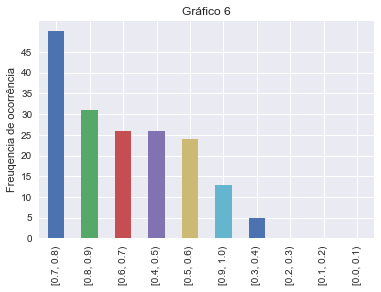

[0.7, 0.8)    50
[0.8, 0.9)    31
[0.6, 0.7)    26
[0.4, 0.5)    26
[0.5, 0.6)    24
[0.9, 1.0)    13
[0.3, 0.4)     5
[0.2, 0.3)     0
[0.1, 0.2)     0
[0.0, 0.1)     0
Name: IDH_Cat, dtype: int64
Moda: 0    0.773
1    0.796
2    0.887
dtype: float64
% do intervalo mais frequênte: 28.571428571428573
% do intervalo menos frequênte: 2.857142857142857
% dos países com IDH > 0,5: 74.85
% dos países com IDH < 0,5: 25.15


In [7]:
#Gráfico 6#
z = np.arange(0,1.1,0.1)
Data['IDH_Cat'].sort_values()
IDH_Categorico = Data['IDH_Cat']
valores3 = IDH_Categorico.value_counts()
valores3.plot.bar()
plt.yticks(range(0,50,5))
plt.title("Gráfico 6")
plt.ylabel("Freuqencia de ocorrência")
plt.show()
print(valores3)
print("Moda: {}".format(IDH.mode()))
print("% do intervalo mais frequênte: {}".format(5000/175))
print("% do intervalo menos frequênte: {}".format(500/175))
print("% dos países com IDH > 0,5: {}".format(74.85))
print("% dos países com IDH < 0,5: {}".format(25.15))

Neste gráfico acima(gráfico 6) pode-se observar que o intervalo mais presente se trata do intervalo de 0,7 a 0,8 o qual é 28,57% de todos os dados desta série, também é possivel anaálisar que não há países com IDH menor que 0,3 e que o intervalo com menor frequência se trata do intervalo de 0,3 a 0,4 o qual representa 2,85% dos valores desta série de dados, e por fim eé possivel concluir que há mais paises com IDH maior que 0,5(exatamente 74,85% dos dados) do que países com IDH menor que 0.5(25,15%).  

# -Análise de Variáveis em conjunto- 

# Índice de desenvolvimento humano (IDH) com Índice de corrupção (CPI) no ano de 2012

A análise destas séries de dados em conjuntos possibilita responder a questão proposta a qual seria: países subdesenvolvidos(baixo IDH) possuem nescessariamente altos índices de corrupção(CPI)?


O início desta análise se trata de usar um gráfico de dispersão(gráfico 7) e calcular a correlação entre estes dados usando o coeficiente de correlação linear de Pearson. 

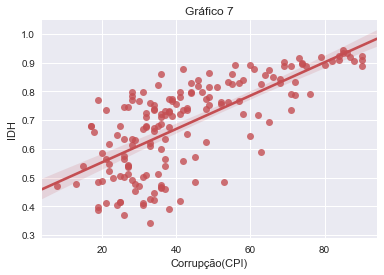

Coeficiente de correlação de pearson: 0.7080171025154374
--------------------------------------------------------------------------------------
Grécia IDH: 0.86
Grécia Corrupção: 36.0/Muito Corruptos(20-40)
--------------------------------------------------------------------------------------
Argentina IDH: 0.823
Argentina Corrupção: 35.0/Muito Corruptos(20-40)
--------------------------------------------------------------------------------------
Bhutan IDH: 0.589
Bhutan Corrupção: 63.0/Pouco Corruptos(60-80)


In [8]:
#Gráfico 7#
Corrup = Corrup_IDH['2012_Corrupção']
IDH = Corrup_IDH['2012_IDH']
sns.regplot(x=Corrup, y=IDH, data=Corrup_IDH,color='r')
plt.title("Gráfico 7")
plt.ylabel("IDH")
plt.xlabel("Corrupção(CPI)")
plt.show()
print("Coeficiente de correlação de pearson: {}".format(Corrup.corr(IDH)))
print("--------------------------------------------------------------------------------------")
print("Grécia IDH: {}".format(Corrup_IDH.loc['Greece','2012_IDH']))
print("Grécia Corrupção: {}/{}".format(Corrup_IDH.loc['Greece','2012_Corrupção'],Corrup_IDH.loc['Greece','Corrupção']))
print("--------------------------------------------------------------------------------------")
print("Argentina IDH: {}".format(Corrup_IDH.loc['Argentina','2012_IDH']))
print("Argentina Corrupção: {}/{}".format(Corrup_IDH.loc['Argentina','2012_Corrupção'],Corrup_IDH.loc['Argentina','Corrupção']))
print("--------------------------------------------------------------------------------------")
print("Bhutan IDH: {}".format(Corrup_IDH.loc['Bhutan','2012_IDH']))
print("Bhutan Corrupção: {}/{}".format(Corrup_IDH.loc['Bhutan','2012_Corrupção'],Corrup_IDH.loc['Bhutan','Corrupção']))

Ao análisar o gráfico de dispersão e as informações impressa abaixo pode-se concluir que os dados possuem uma correlação razoável equivalente a 0.708 e sobre a questão proposta sobre a relação dessas duas variáveis, pode-se dizer que há países os quais seguem o padrão proposto o qual diz que países com baixo IDH possuem altos índices de corrupção porem também existem varias ocorrencias de países os quais possuem altos IDH e uma corrupção elevada por exemplo a Grécia a qual possui um IDH de 0.86(considerado alto) porém um índice de corrupção(CPI) de 36 o qual é considerado muito corrupto, outra exemplo desta quebra do padrão proposto é a Argentina a qual possui um IDH de 0.823(alto) porém um CPI de 35 o qual se encaixa na categoria de muito corruptos e por fim o ultimo exemplo a ser notado se trata do Bhutan o qual apesar de possuir um IDH de 0.589(considerado mediano) possui um CPI de 63 o qual se encaixa na categoria de países pouco corruptos.


### Análise Temporal de IDH com índice de corrupção(CPI):

Será feita uma análise temporal dos dados de IDH com índice de corrupção utilizando 4 anos incluindo 2012 o qual a análise já foi feita acima e também 2013,2014,2015 para poder observar se o comportamento descrito em 2012(acima) se mantem durante os anos seguintes.

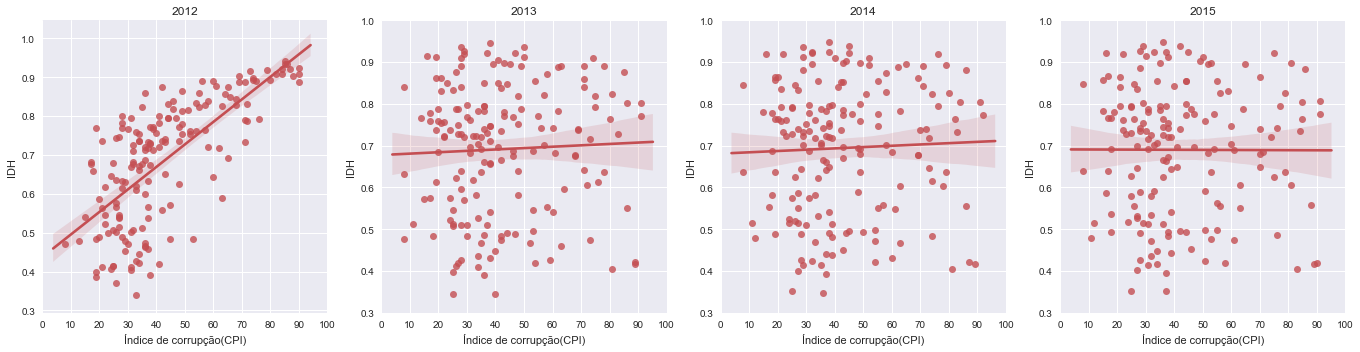

Correlação 2012: 0.7080171025154374
Correlação 2013: 0.04203645029211691
Correlação 2014: 0.039402974538984864
Correlação 2015: -0.0030069289500890724


In [9]:
#Lendo dados completos#
IDH2 = pd.read_excel('hdi_index.xlsx')
CPI = pd.read_excel('corruption_perception.xlsx')
#2013#
IDH2013 = IDH2.loc[:,['geo',2013]]
CPI2013 = CPI.loc[:,[2013]]
Data2013 = IDH2013.join(CPI2013,how='inner',lsuffix='_IDH', rsuffix='_CPI')
#2014#
IDH2014 = IDH2.loc[:,['geo',2014]]
CPI2014 = CPI.loc[:,[2014]]
Data2014 = IDH2014.join(CPI2014,how='inner',lsuffix='_IDH', rsuffix='_CPI')
#2015#
IDH2015 = IDH2.loc[:,['geo',2015]]
CPI2015 = CPI.loc[:,[2015]]
Data2015 = IDH2015.join(CPI2015,how='inner',lsuffix='_IDH', rsuffix='_CPI')
#plotando subplost para analise#
fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
plot = sns.regplot(x=Corrup,y=IDH,color='r')
plt.ylabel('IDH')
plt.xlabel('Índice de corrupção(CPI)')
plt.title("2012")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
####
plt.subplot(142)
plot = sns.regplot(x=Data2013['2013_CPI'],y=Data2013['2013_IDH'],color='r')
plt.ylabel('IDH')
plt.xlabel('Índice de corrupção(CPI)')
plt.title("2013")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
####
plt.subplot(143)
plot = sns.regplot(x=Data2014['2014_CPI'],y=Data2014['2014_IDH'],color='r')
plt.ylabel('IDH')
plt.xlabel('Índice de corrupção(CPI)')
plt.title("2014")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
#####
plt.subplot(144)
plot = sns.regplot(x=Data2015['2015_CPI'],y=Data2015['2015_IDH'],color='r')
plt.ylabel('IDH')
plt.xlabel('Índice de corrupção(CPI)')
plt.title("2015")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
plt.tight_layout()
plt.show()
################################
#Coeficiente de correlação#
print("Correlação 2012: {}".format(Corrup_IDH['2012_Corrupção'].corr(Corrup_IDH['2012_IDH'])))
print("Correlação 2013: {}".format(Data2013['2013_IDH'].corr(Data2013['2013_CPI'])))
print("Correlação 2014: {}".format(Data2014['2014_IDH'].corr(Data2014['2014_CPI'])))
print("Correlação 2015: {}".format(Data2015['2015_IDH'].corr(Data2015['2015_CPI'])))

Ao análisar a série temporal e os dados impressoas abaixo destes, pode ser observado que o ano de 2012 se trata de uma anomalia na série temporal análisada pois seu coeficiente de correlação é equivalente á 0.708(correlação mediana) enquanto os outros anos análisados possuem correlações extremamente baixas(0,04 á -0.003)as quais significa nenhuma correlação entre os dados de corrupção e IDH nestes anos.

# Índice de desenvolvimento humano (IDH) e Usuários de internet (% da população)

A análise destas duas variáveis , torna possivel a exploração e resolução da segunda questão proposta:países com alto índice de acesso a internet significa nescessariamente um pais desenvolvido com alto IDH?


Esta análise será feita com base em um gráfico de dispersão(gráfico 8) no qual podemos análisar a correlação linear entre os dados.

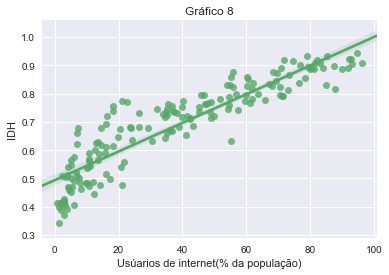

Coeficiente de correlação de pearson: 0.9103669952340202
--------------------------------------------------------------------------------------
Mongolia IDH: 0.72
Mongolia Usuários de internet: 16.4%


In [10]:
#Gráfico 8#
I = NetIDH['2012_IDH']
Net = NetIDH['2012_Usuários_Internet']
sns.regplot(x=Net, y=I, data=Corrup_IDH,color="g")
plt.title("Gráfico 8")
plt.xlabel("Usúarios de internet(% da população)")
plt.ylabel("IDH")
plt.show()
print("Coeficiente de correlação de pearson: {}".format(Net.corr(IDH)))
print("--------------------------------------------------------------------------------------")
print("Mongolia IDH: {}".format(NetIDH.loc['Mongolia','2012_IDH']))
print("Mongolia Usuários de internet: {}%".format(NetIDH.loc['Mongolia','2012_Usuários_Internet']))

Ao análisar o gráfico acima de dispersão(gráfico 8) e os dados impressos abaixo deste, pode-se dizer que os dados possuem uma correlação equivalente a 0.910 o qual se trata de uma correlação elevada apesar de haver alguns países com IDH altos e % de população com acesso a internet baixo, como por exemplo a Mongolia a qual possui um IDH de 0.72(IDH alto) porem possui uma % de população com acesso a internet de 16,4%.


### Análise Temporal de IDH com % da população com acesso a internet:

Será feita uma análise temporal dos dados de IDH com % da população com acesso a internet utilizando 5 anos incluindo 2012 o qual a análise já foi feita acima e também 2011,2013,2014,2015 para poder observar se o comportamento descrito em 2012(acima) se mantem durante os anos seguintes e o anterior.

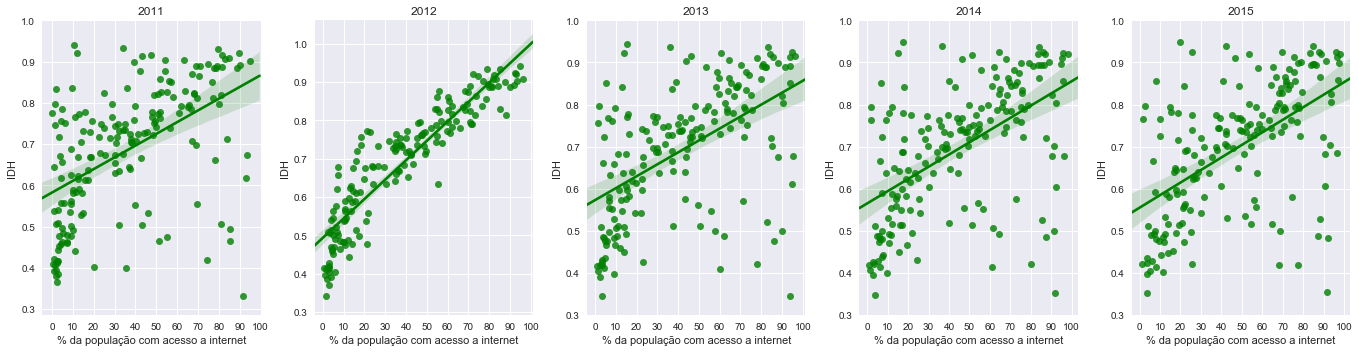

Correlação 2011: 0.508834793996666
Correlação 2012: 0.9103669952340202
Correlação 2013: 0.531396307316016
Correlação 2014: 0.5422190347821623
Correlação 2015: 0.5503652233942157


In [11]:
#Lendo dados completos#
IDH2 = pd.read_excel('hdi_index.xlsx')
NetUsers = pd.read_excel('internet_users.xlsx')
#2011#
IDH2011 = IDH2.loc[:,['geo',2011]]
NetUsers2011 = NetUsers.loc[:,[2011]]
Data2011 = IDH2011.join(NetUsers2011,how='inner',lsuffix='_IDH', rsuffix='_Internet_Users')
#2013#
IDH2013 = IDH2.loc[:,['geo',2013]]
NetUsers2013 = NetUsers.loc[:,[2013]]
Data2013 = IDH2013.join(NetUsers2013,how='inner',lsuffix='_IDH', rsuffix='_Internet_Users')
#2014#
IDH2014 = IDH2.loc[:,['geo',2014]]
NetUsers2014 = NetUsers.loc[:,[2014]]
Data2014 = IDH2014.join(NetUsers2014,how='inner',lsuffix='_IDH', rsuffix='_Internet_Users')
#2015#
IDH2015 = IDH2.loc[:,['geo',2015]]
NetUsers2015 = NetUsers.loc[:,[2015]]
Data2015 = IDH2015.join(NetUsers2015,how='inner',lsuffix='_IDH', rsuffix='_Internet_Users')
#plotando subplost para analise#
fig = plt.figure(figsize=(19, 5))
plt.subplot(151)
plot = sns.regplot(x=Data2011['2011_Internet_Users'],y=Data2011['2011_IDH'],color='green')
plt.ylabel('IDH')
plt.xlabel('% da população com acesso a internet')
plt.title("2011")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
####
plt.subplot(152)
plot = sns.regplot(x=Net,y=I,color='green')
plt.ylabel('IDH')
plt.xlabel('% da população com acesso a internet')
plt.title("2012")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
####
plt.subplot(153)
plot = sns.regplot(x=Data2013['2013_Internet_Users'],y=Data2013['2013_IDH'],color='green')
plt.ylabel('IDH')
plt.xlabel('% da população com acesso a internet')
plt.title("2013")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
#####
plt.subplot(154)
plot = sns.regplot(x=Data2014['2014_Internet_Users'],y=Data2014['2014_IDH'],color='green')
plt.ylabel('IDH')
plt.xlabel('% da população com acesso a internet')
plt.title("2014")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
#####
plt.subplot(155)
plot = sns.regplot(x=Data2015['2015_Internet_Users'],y=Data2015['2015_IDH'],color='green')
plt.ylabel('IDH')
plt.xlabel('% da população com acesso a internet')
plt.title("2015")
plt.yticks(np.arange(0.3,1.1,0.1))
plt.xticks(range(0,110,10))
plt.tight_layout()
plt.show()
################################
#Coeficiente de correlação#
print("Correlação 2011: {}".format(Data2011['2011_IDH'].corr(Data2011['2011_Internet_Users'])))
print("Correlação 2012: {}".format(NetIDH['2012_Usuários_Internet'].corr(NetIDH['2012_IDH'])))
print("Correlação 2013: {}".format(Data2013['2013_IDH'].corr(Data2013['2013_Internet_Users'])))
print("Correlação 2014: {}".format(Data2014['2014_IDH'].corr(Data2014['2014_Internet_Users'])))
print("Correlação 2015: {}".format(Data2015['2015_IDH'].corr(Data2015['2015_Internet_Users'])))

Ao análisar os dados durante os anos acima da série temporal e as informações impressas abaixo, pode-se observar que o comportamento e correlação observados pela análise detalhada de 2012 se trata de uma anomalia ao ser comparado com seus 3 anos posteriores(2013,2014,2015) e seu ano anterior(2011) pois seu coeficiente de correlação é equivalente a 0.910 enquanto os coeficiente dos outros anos análisados se encontram entre 0.5 e 0.55(correlação mediana)

# Usuários de internet (% da população) e Índice de corrupção (CPI)

A análise destas variáveis possibilita encontrar uma possivel relação entre elas.


O início desta análise se baseia no uso de um gráfico de dispersão(gráfico 9) para poder ser análisado a correlação entre estas duas variáveis e a linha de tendência.

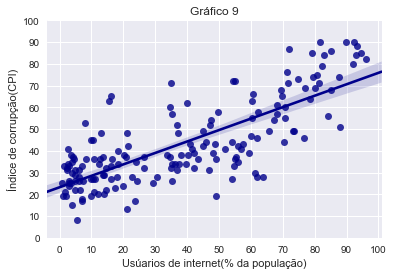

Coeficiente de correlação de pearson: 0.7772788082115425
--------------------------------------------------------------------------------------
St. Lucia Usuários de Internet: 34.8%
St. Lucia Índice de corrupção: 71.0


In [12]:
#Gráfico 9#
C = Corrup_IDH['2012_Corrupção']
Net = NetIDH['2012_Usuários_Internet']
sns.regplot(x=Net, y=C, data=Corrup_IDH,color="DarkBlue")
plt.title("Gráfico 9")
plt.yticks(range(0,110,10))
plt.xticks(range(0,110,10))
plt.xlabel("Usúarios de internet(% da população)")
plt.ylabel("Índice de corrupção(CPI)")
plt.show()
print("Coeficiente de correlação de pearson: {}".format(Net.corr(C)))
print("--------------------------------------------------------------------------------------")
print("St. Lucia Usuários de Internet: {}%".format(Data.loc['St. Lucia','2012_Usuários_Internet']))
print("St. Lucia Índice de corrupção: {}".format(Data.loc['St. Lucia','2012_Corrupção']))

Ao análisar o gráfico de dispersão acima(gráfico 9) e o dados impressos abaixo deste pode-se observar que os dados possuem uma correlação boa equivalente a 0.777 e uma linha de tendência considerável, apesar dos dados seguirem um padrão o qual seriá quanto maior o CPI(menos corrupção), maior é a % da população com acesso a internet porém existem algums exemplos de países os quais quebram este padrão, por exemplo St. Lucia o qual possui um CPI de 71(considerado pouco corrupto) porem sómente 34,8% da população com acesso a internet.

## Análise temporal de % da população com acesso a internet e índice de corrupção(CPI):


Esta análise será feita para poder ser análisado se o comportamento observado em 2012 na análise acima se mantem nos anos seguintes ou se o ano análisado(2012) se trata de uma exceção.A análise será feita com os anos de 2013,2014,2015 e 2012 o qual já foi análisado detalhadamente acima.

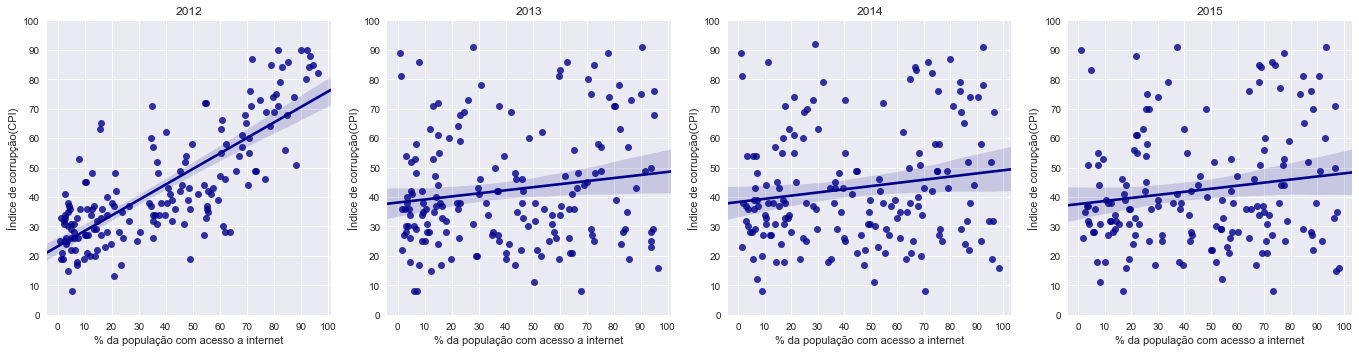

Correlação 2012: 0.7772788082115425
Correlação 2013: 0.15365207004747303
Correlação 2014: 0.16036113936581425
Correlação 2015: 0.14959701352379748


In [13]:
#Lendo dados completos#
CPI = pd.read_excel('corruption_perception.xlsx')
NetUsers = pd.read_excel('internet_users.xlsx')
#2013#
CPI2013 = CPI.loc[:,['geo',2013]]
NetUsers2013 = NetUsers.loc[:,[2013]]
Data2013 = CPI2013.join(NetUsers2013,how='inner',lsuffix='_CPI', rsuffix='_Internet_Users')
#2014#
CPI2014 = CPI.loc[:,['geo',2014]]
NetUsers2014 = NetUsers.loc[:,[2014]]
Data2014 = CPI2014.join(NetUsers2014,how='inner',lsuffix='_CPI', rsuffix='_Internet_Users')
#2015#
CPI2015 = CPI.loc[:,['geo',2015]]
NetUsers2015 = NetUsers.loc[:,[2015]]
Data2015 = CPI2015.join(NetUsers2015,how='inner',lsuffix='_CPI', rsuffix='_Internet_Users')
#plotando subplost para analise#
fig = plt.figure(figsize=(19, 5))
plt.subplot(141)
plot = sns.regplot(x=Net,y=C,color='DarkBlue')
plt.ylabel('Índice de corrupção(CPI)')
plt.xlabel('% da população com acesso a internet')
plt.title("2012")
plt.yticks(range(0,110,10))
plt.xticks(range(0,110,10))
####
plt.subplot(142)
plot = sns.regplot(x=Data2013['2013_Internet_Users'],y=Data2013['2013_CPI'],color='DarkBlue')
plt.ylabel('Índice de corrupção(CPI)')
plt.xlabel('% da população com acesso a internet')
plt.title("2013")
plt.yticks(range(0,110,10))
plt.xticks(range(0,110,10))
#####
plt.subplot(143)
plot = sns.regplot(x=Data2014['2014_Internet_Users'],y=Data2014['2014_CPI'],color='DarkBlue')
plt.ylabel('Índice de corrupção(CPI)')
plt.xlabel('% da população com acesso a internet')
plt.title("2014")
plt.yticks(range(0,110,10))
plt.xticks(range(0,110,10))
#####
plt.subplot(144)
plot = sns.regplot(x=Data2015['2015_Internet_Users'],y=Data2015['2015_CPI'],color='DarkBlue')
plt.ylabel('Índice de corrupção(CPI)')
plt.xlabel('% da população com acesso a internet')
plt.title("2015")
plt.yticks(range(0,110,10))
plt.xticks(range(0,110,10))
plt.tight_layout()
plt.show()
################################
#Coeficiente de correlação#
print("Correlação 2012: {}".format(Net.corr(C)))
print("Correlação 2013: {}".format(Data2013['2013_CPI'].corr(Data2013['2013_Internet_Users'])))
print("Correlação 2014: {}".format(Data2014['2014_CPI'].corr(Data2014['2014_Internet_Users'])))
print("Correlação 2015: {}".format(Data2015['2015_CPI'].corr(Data2015['2015_Internet_Users'])))

Ao análisar a série temporal acima e os dados impressos abaixo desta série, é possivel observar que o ano de 2012 é uma anomalia em comparação aos anos seguintes pois em 2012 a correlação entre % da população com índice de corrupção é igual a 0.777(correlação boa) porem nos anos seguintes as correlaçoões estão entre 0.149 e 0.160.

# Conclusão

Após a análise das variáveis em conjunto pode-se responder e concluir as questões propostas no inicio das análises as quais são: países subdesenvolvidos(baixo IDH) possuem nescessariamente altos índices de corrupção(CPI)? e países com alto índice de acesso a internet significa nescessariamente um pais desenvolvido com alto IDH ?.Vale lembrar que não é possivel alegar causalidade entre variáveis através somente da análise de dados, para isso seria nescessario um estudo social destas variáveis e suas consequências.


A primeira questão a qual se refere sobre a relação de IDH com o índice de corrupção pode ser análisada e concluida com a análise feita das duas variaveis em conjunto no ano de 2012 a qual indica uma correlação entre as variáveis razoavel de 0.708, por fim pode ser concluido que as variáveis possuem uma relação, e o padrão proposto(quanto maior o indice de corrupção menor o IDH) se mostra razoavelmente presente em 2012, porem não totalmente direta pois há varias ocorrências de países fugindo do padrão proposto, no entanto quando é análisada a série temporal dos anos seguintes para observar se o comportamento observado permanece, é possivel concluir que o ano de 2012 não pasa de uma anomalia pois ao análisarmos os 3 anos seguintes temos que os dados de índice de corrupção e IDH não se correlacionam e o padrão proposto não se aplica.


A segunda questão proposta a qual se refere a relação entre % da população com acesso a internet com IDH pode ser análisada e por fim dada uma conclusão com base na análise feita entre as duas variáveis juntas no ano de 2012 a qual aponta uma correlação de 0.910 a qual é considerada alta.Por fim pode ser concluido que o padrão proposto entre essas duas variáveis(quanto menor o IDH, menor sera a % da população com acesso a internet) é altamente presente em 2012 apesar de algums poucos países fugindo deste padrão e assim pode-se dizer que as variáveis possuem alta relação no ano análisado por causa de seu coeficiente de correlação alto e poucos exemplos fugindo da tendência assim possibilitando a conclusão de que a % de população com acesso a internet de um país é influenciada(pela visão dos dados) pelo IDH do país no ano de 2012, porem ao análisarmos a série temporal destes dados em conjunto temos que o ano de 2012 se trata de uma exceção em comparação ao seus anos seguintes e antecessor pois nestes anos análisados temos que os dados de IDH e % da população com acesso a internet possuem uma baixissima correlação e nenhuma presença do padrão prposto e comportamento observado em 2012.


A análise das variáveis % de população com acesso a internet e índice de corrupção no ano de 2012 possibilita a conclusão que estas variáveis se relacionam pois possuem um coeficiente de correlação de 0.777 no ano de 2012 e alguns exemplos de países fugindo da tendência do gráfico(gráfico 9) porem a relação em 2012 se trata de uma relação razoável e não completamente direta pois se tratam de duas variáveis distintas em natureza, sendo corrupção sobre política e % de população com acesso a internet de natureza economica e social, entretanto ao analisar a série temporal destas duas variáveis em conjunto é observado que estas duas variáveis não possuem nenhuma correlação pois nos anos seguintes a 2012 os coeficientes de correlação não ultrapassam 0.16(Correlação nenhuma) e o ano de 2012 se trata de uma anomalia e por fim pode-se concluir que o comportamento observado em 2012 não reflete o comportamento nos 3 anos seguintes e não passa de uma anomalia.


## *Fontes:*
### *https://www.gapminder.org/data/*
### *https://en.wikipedia.org/wiki/Corruption_Perceptions_Index*
### *https://en.wikipedia.org/wiki/Human_Development_Index*